In [35]:
import json
from collections import Counter
import pandas as pd
import matplotlib.pyplot as plt

In [37]:
# read json file
with open("data/gemini-1.5-pro_fast_500 times.json", "r", encoding="utf-8") as file:
    data=json.load(file)

# extract "responses" from the file
responses=data["responses"] 

# 确保每个响应是字典而非字符串
parsed_responses=[]
for response in responses:
    if isinstance(response, str):  # if it is a string, then parse it into dictionary
        try:
            parsed_responses.append(json.loads(response))
        except json.JSONDecodeError:
            print("无法解析响应为JSON：", response) # catch errors by "try-excpet"
    elif isinstance(response, dict):  # for the situation that it has already been dictonary
        parsed_responses.append(response)

print(parsed_responses)

无法解析响应为JSON： **Sorted Options:**
1. a
2. d
3. c
4. e
5. b

**Reasoning:**
1. **Reasons for Selection Order:** Linda's description makes her seem like a feminist activist.  Being a bank teller seems less likely given her background.  The combined option (c) feels intuitively less probable than just being a feminist.
2. **Reasoning Steps:**  Linda's description immediately brought to mind a feminist activist. Bank teller felt like a mismatch.  Combining the two seemed even less likely than her being just a bank teller.  The "either/or" (e) felt less likely than being a feminist only.

无法解析响应为JSON： **Sorted Options:**
1. a
2. d
3. c
4. b
5. e

**Reasoning:**
1. **Reasons for Selection Order:** Linda's description strongly suggests she'd be a feminist.  Being a bank teller seems less likely given her background.  Combining the two makes it even less likely.
2. **Reasoning Steps:**  Linda's profile fits the stereotype of a feminist.  Being both a feminist and a bank teller feels less probab

In [39]:
# extract the option from responses
sorted_options = []
for response in responses:
    if "**Sorted Options:**" in response:
        sorted_part=response.split("**Sorted Options:**")[1].split("\n\n")[0].strip() # extract the content after "**Sorted Options:**" but before "\n\n"
        orders=[line.split(".")[1].strip() for line in sorted_part.split("\n")] # extract options
        sorted_options.append(orders)

# Create a counter at each ordinal position and count the number of times the option appears in each position
orders_counts= {order: Counter() for order in range(1, 6)}
for orders in sorted_options:
    for i, option in enumerate(orders, 1):
        orders_counts[i][option]+=1
orders_counts

{1: Counter({'a': 500}),
 2: Counter({'d': 499, 'c': 1}),
 3: Counter({'c': 494, 'e': 5, 'd': 1}),
 4: Counter({'e': 477, 'b': 18, 'c': 5}),
 5: Counter({'b': 482, 'e': 18})}

In [41]:
# create a dataframe
orders_data = {f"Order {order}": dict(counts) for order, counts in orders_counts.items()}
df = pd.DataFrame(orders_data).fillna(0)

df1= df.T # tranpose the row and column

In [43]:
#caculate the conjunction and disjunction error
conjunction_fallacy_count= 0  
disjunction_fallacy_count= 0         
total_responses= len(sorted_options)

for orders in sorted_options:
    if orders.index('c') < orders.index('b'):
        conjunction_fallacy_count +=1

    if orders.index('a') < orders.index('e'):
        disjunction_fallacy_count +=1


conjunction_fallacy_prob= "%.2f%%"%((conjunction_fallacy_count / total_responses)*100)
disjunction_fallacy_prob= "%.2f%%"%((disjunction_fallacy_count / total_responses)*100)


print("The probability of conjunction fallacy is:",conjunction_fallacy_prob)
print("The probability of disjunction fallacy is:",disjunction_fallacy_prob)

The probability of conjunction fallacy is: 100.00%
The probability of disjunction fallacy is: 100.00%


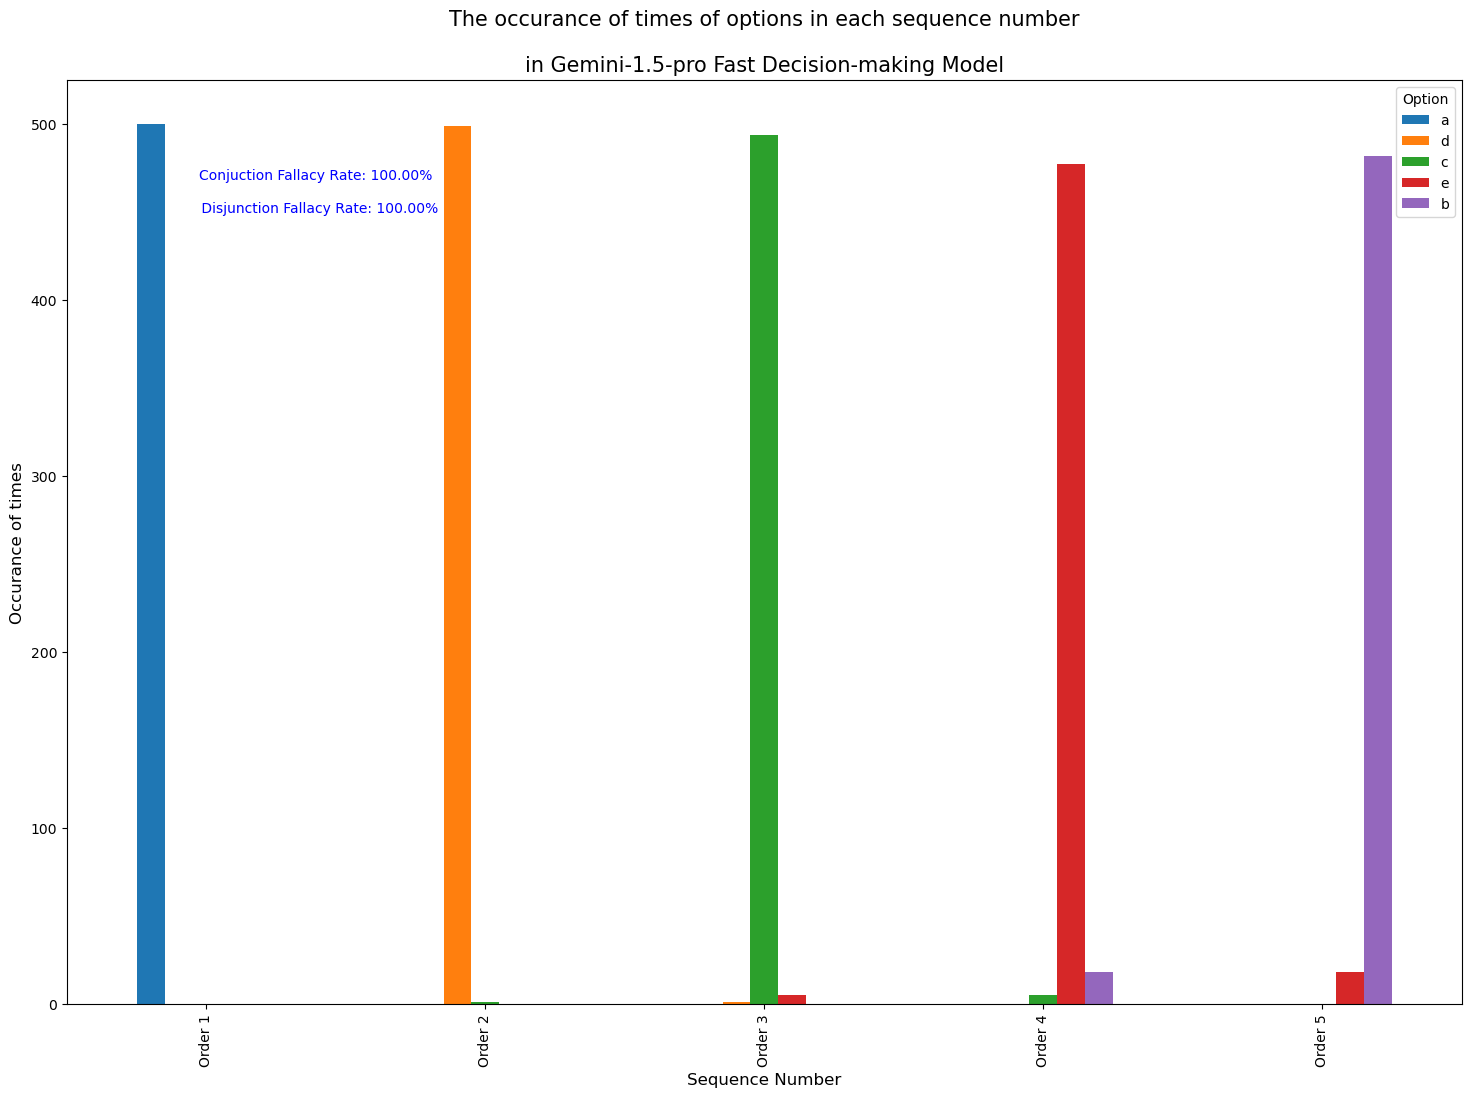

In [45]:
df1.plot(kind="bar", figsize=(18, 12))
plt.title("The occurance of times of options in each sequence number\n\nin Gemini-1.5-pro Fast Decision-making Model",fontsize=15)
plt.xlabel("Sequence Number",fontsize=12)
plt.ylabel("Occurance of times",fontsize=12)
plt.legend(title="Option")
plt.text(0.4,450,"Conjuction Fallacy Rate: 100.00% \n\n Disjunction Fallacy Rate: 100.00%",ha="center",fontdict={"color":"blue"})
plt.savefig("Figure/Gemini-1.5-pro Decision-making Model.jpg",dpi=600)
plt.show()